This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# RADOLAN data formats

## RADOLAN binary data format

The RADOLAN binary data file format is described in the RADOLAN Kompositformat. The radolan composite files consists of an ascii header containing all needed information to decode the following binary data block. $\omega radlib$ provides [wradlib.io.read_radolan_composite()](https://docs.wradlib.org/en/latest/generated/wradlib.io.radolan.read_radolan_composite.html) to read the data.

The function `wradlib.io.parse_dwd_composite_header()` takes care of correctly decoding the ascii header. All available header information is transferred into the metadata dictionary.

In [1]:
import wradlib as wrl
import wradlib_data
import matplotlib.pyplot as plt
import warnings
import io
import tarfile

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()
import numpy as np

In [2]:
# load radolan files
rw_filename = wradlib_data.DATASETS.fetch(
    "radolan/misc/raa01-rw_10000-1408102050-dwd---bin.gz"
)
filehandle = wrl.io.get_radolan_filehandle(rw_filename)
header = wrl.io.read_radolan_header(filehandle)
print(header)

RW102050100000814BY1620134VS 3SW   2.13.1PR E-01INT  60GP 900x 900MS 62<boo,ros,emd,hnr,umd,pro,ess,asd,neu,nhb,oft,tur,isn,fbg,mem> 


In [3]:
attrs = wrl.io.parse_dwd_composite_header(header)
print(attrs)

{'producttype': 'RW', 'datetime': datetime.datetime(2014, 8, 10, 20, 50), 'radarid': '10000', 'nrow': 900, 'ncol': 900, 'datasize': 1620000, 'formatversion': 3, 'maxrange': '150 km', 'radolanversion': '2.13.1', 'precision': 0.1, 'intervalseconds': 3600, 'radarlocations': ['boo', 'ros', 'emd', 'hnr', 'umd', 'pro', 'ess', 'asd', 'neu', 'nhb', 'oft', 'tur', 'isn', 'fbg', 'mem']}


In the following example, the header information of four different composites is extracted.

In [4]:
# load radolan file
filename = "radolan/showcase/raa01-rx_10000-1408102050-dwd---bin.gz"
rx_filename = wradlib_data.DATASETS.fetch(filename)
filename = "radolan/showcase/raa01-ex_10000-1408102050-dwd---bin.gz"
ex_filename = wradlib_data.DATASETS.fetch(filename)
filename = "radolan/showcase/raa01-rw_10000-1408102050-dwd---bin.gz"
rw_filename = wradlib_data.DATASETS.fetch(filename)
filename = "radolan/showcase/raa01-sf_10000-1408102050-dwd---bin.gz"
sf_filename = wradlib_data.DATASETS.fetch(filename)

rxdata, rxattrs = wrl.io.read_radolan_composite(rx_filename)
exdata, exattrs = wrl.io.read_radolan_composite(ex_filename)
rwdata, rwattrs = wrl.io.read_radolan_composite(rw_filename)
sfdata, sfattrs = wrl.io.read_radolan_composite(sf_filename)

# print the available attributes
print("RX Attributes:")
for key, value in rxattrs.items():
    print(key + ":", value)
print("----------------------------------------------------------------")
# print the available attributes
print("EX Attributes:")
for key, value in exattrs.items():
    print(key + ":", value)
print("----------------------------------------------------------------")

# print the available attributes
print("RW Attributes:")
for key, value in rwattrs.items():
    print(key + ":", value)
print("----------------------------------------------------------------")

# print the available attributes
print("SF Attributes:")
for key, value in sfattrs.items():
    print(key + ":", value)
print("----------------------------------------------------------------")

RX Attributes:
producttype: RX
datetime: 2014-08-10 20:50:00
radarid: 10000
nrow: 900
ncol: 900
datasize: 810000
formatversion: 3
maxrange: 150 km
radolanversion: 2.13.1
precision: 1.0
intervalseconds: 300
radarlocations: ['boo', 'ros', 'emd', 'hnr', 'umd', 'pro', 'ess', 'asd', 'neu', 'nhb', 'oft', 'tur', 'isn', 'fbg', 'mem', 'bdy']
nodataflag: -9999
nodatamask: [     0      1      2 ... 809997 809998 809999]
cluttermask: []
----------------------------------------------------------------
EX Attributes:
producttype: EX
datetime: 2014-08-10 20:50:00
radarid: 10000
nrow: 1500
ncol: 1400
datasize: 2100000
formatversion: 2
maxrange: 128 km
radolanversion: 2.13.1
precision: 1.0
intervalseconds: 300
radarlocations: ['sin', 'rom', 'vir', 'bor', 'nld', 'zav', 'wid', 'sui', 'abv', 'ave', 'tra', 'arc', 'ncy', 'bgs', 'bla', 'sly', 'sem', 'boo', 'ros', 'emd', 'hnr', 'umd', 'pro', 'ess', 'asd', 'neu', 'nhb', 'oft', 'tur', 'isn', 'fbg', 'mem', 'bdy', 'ska']
nodataflag: -9999
nodatamask: [    743    

## RADOLAN ASCII data format

The ASCII GIS Format is prepended by a limited header and has two flavours as follows:

- RADOLAN / reproc (RADARKLIMATOLOGIE) 2001 – 2019

```
    ncols 900
    nrows 1100
    xllcorner -443462
    yllcorner -4758645
    cellsize 1000
    nodata_value -9999.0
```    
    Units: 1.0 mm

- RADOLAN / recent, 2020 – jetzt :
```
    ncols 900
    nrows 900
    xllcorner -523462y
    llcorner -4658645
    cellsize 1000
    NODATA_value -1
```
    Units: 0.1 mm
    
Product and Datetime need to be extracted from the filename, so extra care has to be taken to not tamper with the filenames.

In [5]:
fname = wradlib_data.DATASETS.fetch("radolan/asc/RW-20221018.tar.gz")
fp = tarfile.open(fname)
names = fp.getnames()
buffer = [io.BytesIO(fp.extractfile(name).read()) for name in names]
for buf, name in zip(buffer, names):
    buf.name = name
ds = wrl.io.open_radolan_mfdataset(buffer)

In [6]:
display(ds)

<xarray.Dataset> Size: 156MB
Dimensions:  (time: 24, y: 900, x: 900)
Coordinates:
  * time     (time) datetime64[ns] 192B 2022-10-18T00:50:00 ... 2022-10-18T23...
  * y        (y) float64 7kB -4.658e+06 -4.657e+06 ... -3.76e+06 -3.759e+06
  * x        (x) float64 7kB -5.23e+05 -5.22e+05 -5.21e+05 ... 3.75e+05 3.76e+05
Data variables:
    RW       (time, y, x) float64 156MB dask.array<chunksize=(1, 900, 900), meta=np.ndarray>
Attributes:
    radarid:  10000

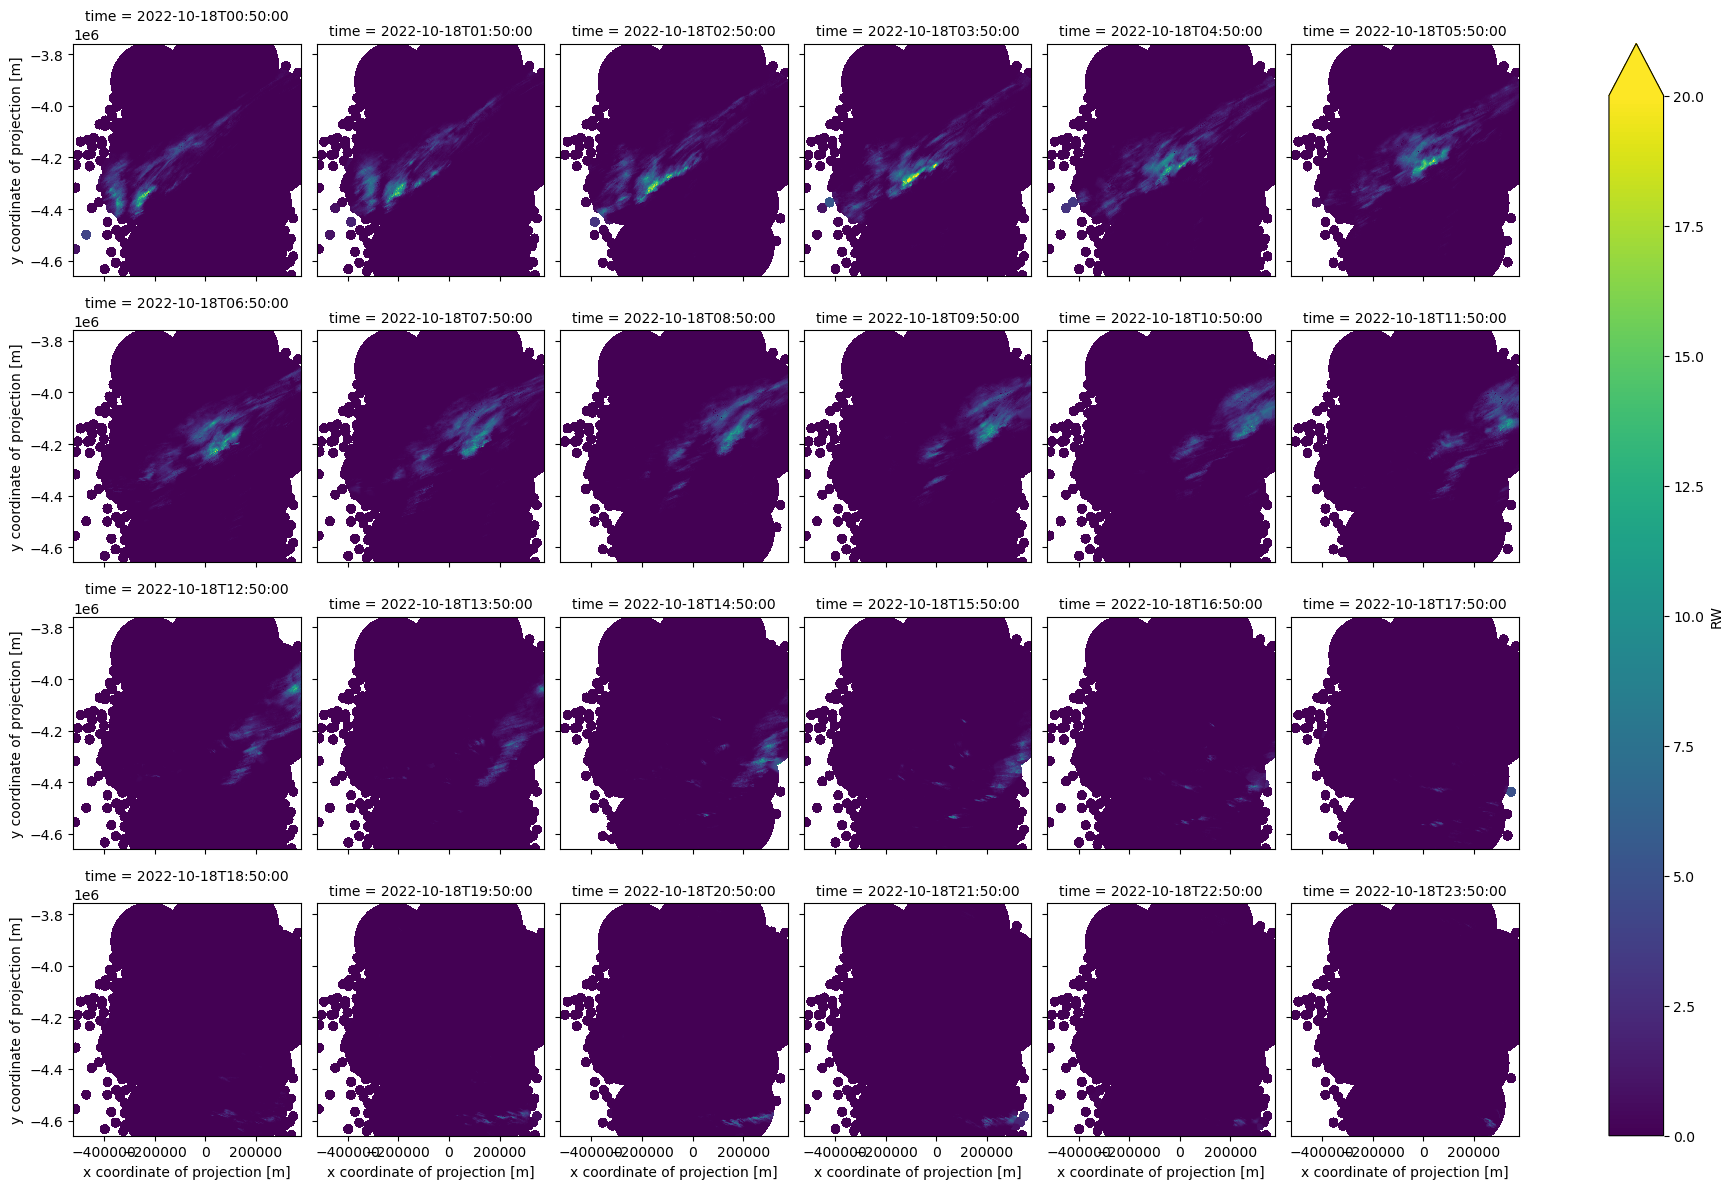

In [7]:
ds.RW.plot(col="time", col_wrap=6, vmax=20)